# PART3 パラメータをチューニング

## import

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

from sklearn.tree import DecisionTreeClassifier as DT
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV

/Users/tahara/.pyenv/versions/anaconda3-5.2.0/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


## データの読み込み
- train.csvとtest.csvとsubmit_sample.csvの３つのファイルを読み込み
- それぞれを読み込んだものは変数はtrain, test, sampleに代入

In [2]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
sample = pd.read_csv("submit_sample.csv",header=None)

## trainから説明変数となるデータを取り出し
- iloc[]を使います
- y以外を説明変数として取り出し、変数trainXに代入

In [3]:
trainX = train.iloc[:,0:17]

## trainから目的変数となるデータを取り出し
- yを選択し、変数yに代入

In [4]:
y = train["y"]

## testから説明変数となるデータを取り出し
- testの全てのカラムが説明変数となりますので、copy関数を使って変数testXに代入

In [5]:
testX = test.copy()

## trainXとtestXをダミー変数化

In [6]:
trainX = pd.get_dummies(trainX)
testX = pd.get_dummies(testX)

## 決定木モデルの箱を用意
- 変数名をclf1とし、DT()を代入しましょう
- パラメータは一旦、max_depth=2, min_samples_leaf=500としす。

In [11]:
clf1 = DT(max_depth=2, min_samples_leaf=500)

## クロスバリデーションをしてclf1の精度を確認
- cross_validate関数を使います
- オプションには、clf1, trainX, y, cv=5, scoring="roc_auc",n_jobs=-1と書きます

In [12]:
cross_validate(clf1, trainX, y, cv=5, scoring="roc_auc",n_jobs=-1)

/Users/tahara/.pyenv/versions/anaconda3-5.2.0/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


{'fit_time': array([0.07896018, 0.08906817, 0.11198378, 0.10138798, 0.04806614]),
 'score_time': array([0.23481274, 0.20896101, 0.18904495, 0.17332411, 0.00289297]),
 'test_score': array([0.74657601, 0.76182968, 0.73117591, 0.73708019, 0.75909278]),
 'train_score': array([0.74534692, 0.74543889, 0.75305367, 0.75162308, 0.74613685])}

## 異なるパラメータでもう一度決定木の箱を準備
- 変数はclf2としましょう
- パラメータはmax_depth=10, min_samples_leaf=500としましょう

In [13]:
clf2 = DT(max_depth=10, min_samples_leaf=500)

## クロスバリデーションをしてclf2の精度を確認

In [14]:
cross_validate(clf2, trainX, y, cv=5, scoring="roc_auc",n_jobs=-1)

/Users/tahara/.pyenv/versions/anaconda3-5.2.0/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


{'fit_time': array([0.23423219, 0.22562695, 0.19493794, 0.18706608, 0.10119486]),
 'score_time': array([0.21145391, 0.22033215, 0.20340395, 0.21038914, 0.00438333]),
 'test_score': array([0.88264002, 0.88482571, 0.86778474, 0.89240308, 0.88344359]),
 'train_score': array([0.88842017, 0.89038512, 0.89288003, 0.88763037, 0.88561317])}

## 新たな決定木モデルの箱を準備
- 変数clf3とし、今回は特にパラメータはセットしません

In [15]:
clf3 = DT()

## グリッドサーチを試す
- パラメータの範囲を指定し、その範囲をしらみつぶしに調べることで、最適なパラメータを探索することをグリッドサーチといいます
- グリッドサーチ＋クロスバリデーションの組み合わせは良くパラメータ探索の方法として利用されます
- まず探索するパラメータの範囲を表す変数parametersを作ります
- この変数を作る時、"カギ"括弧ではなく、"波"括弧であることに注意して下さい
- {"パラメータの名前①":[範囲], "パラメータの名前②":[範囲]...}のように書きます
- 今回はmax_depthを2から10まで探索してみます

In [ ]:
parameters = {"max_depth":[2,3,4,5,6,7,8,9,10]}

In [16]:
parameters = {"max_depth":list(range(2,11))}

## グリッドサーチ+クロスバリデーションで最適なパラメータを探す

- GridSearchCV関数を使います
- オプションとして、clf3, parameters, cv=5, scoring="roc_auc",n_jobs=-1と書きます
- グリッドサーチの結果は、変数gcvに代入しましょう
- その後、fit関数を使って、探索をしましょう

In [17]:
gcv = GridSearchCV(clf3, parameters, cv=5, scoring="roc_auc",n_jobs=-1)
gcv.fit(trainX,y)

GridSearchCV(cv=5, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

## グリッドサーチの結果を確認
- cv_results_で結果を見る事が出来ます

In [19]:
gcv.cv_results_

/Users/tahara/.pyenv/versions/anaconda3-5.2.0/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/Users/tahara/.pyenv/versions/anaconda3-5.2.0/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/Users/tahara/.pyenv/versions/anaconda3-5.2.0/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  war

{'mean_fit_time': array([0.08132486, 0.09416852, 0.12107158, 0.14590812, 0.16351876,
        0.18745956, 0.20474591, 0.23662624, 0.25067291]),
 'std_fit_time': array([0.00869689, 0.00269004, 0.00421112, 0.0085292 , 0.00487535,
        0.00746276, 0.00462201, 0.00995032, 0.04727019]),
 'mean_score_time': array([0.21512794, 0.00489345, 0.00526047, 0.00500245, 0.00618887,
        0.00539246, 0.00645833, 0.00545592, 0.00405302]),
 'std_score_time': array([0.10118815, 0.00179304, 0.00044158, 0.0006278 , 0.00192582,
        0.00079545, 0.00294367, 0.00095106, 0.00064248]),
 'param_max_depth': masked_array(data=[2, 3, 4, 5, 6, 7, 8, 9, 10],
              mask=[False, False, False, False, False, False, False, False,
                    False],
        fill_value='?',
             dtype=object),
 'params': [{'max_depth': 2},
  {'max_depth': 3},
  {'max_depth': 4},
  {'max_depth': 5},
  {'max_depth': 6},
  {'max_depth': 7},
  {'max_depth': 8},
  {'max_depth': 9},
  {'max_depth': 10}],
 'split0_t

## cv_results_の中で重要な２つを確認
- cv_results_["mean_train_score"]とcv_results_["mean_test_score"]です
- それぞれ変数train_scoreとtest_scoreに代入しましょう

In [20]:
train_score = gcv.cv_results_["mean_train_score"]
test_score = gcv.cv_results_["mean_test_score"]

/Users/tahara/.pyenv/versions/anaconda3-5.2.0/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


In [22]:
train_score

array([0.74831988, 0.81244475, 0.84413657, 0.85725938, 0.86925056,
       0.88598326, 0.89893653, 0.91025834, 0.92422846])

## train_scoreとtest_scoreを可視化
- x軸をmax_depth、y軸をaucとしてグラフを描きます
- 何も設定しないとx軸は0からスタートとなり、実際の値とずれてしまうので、調整が必要です
- 調整をする為には、plt.xticks([0,1],[2,3])のように書きます
- 上記のオプションの意味は何もしない時に0のものを2とし、1のものを3とする、という意味になります
- 今回はmax_depthを2～10まで調べたので9点あります

([<matplotlib.axis.XTick at 0x101e9fbe0>,
 <a list of 9 Text xticklabel objects>)

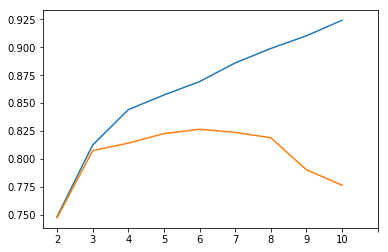

In [23]:
plt.plot(train_score)
plt.plot(test_score)
plt.xticks([0,1,2,3,4,5,6,7,8,9],[2,3,4,5,6,7,8,9,10])

## グリッドサーチで選ばれたパラメータを確認
- best_params_で結果を見ることができます

In [24]:
gcv.best_params_

{'max_depth': 6}

## testの予測
- gcvもpredict_proba関数を持っており、自動的に最適なパラメータを使ったモデルで予測がされます
- 予測結果はpredに代入しましょう。その後、1の確率のみを取り出して、再びpredに代入しましょう

In [25]:
pred = gcv.predict_proba(testX)

In [26]:
pred = pred[:,1]

## predをsample[1]に代入してファイル出力
- ファイル名は「submit3_bank.csv」
- index=None,header=Noneのオプションを忘れないように書きだし

In [27]:
sample[1] =pred

In [28]:
sample.to_csv("submit3_bank.csv",index=None,header=None)

# 練習

1.新たな決定木モデルの箱を変数clf4として準備してみよう。パラメータの設定は不要です

In [35]:
clf4 = DT()

2.max_depthとmin_samples_leafの値の範囲を指定した変数parameters2を作ろう
- max_depthは2～10まで、min_samples_leafは[5,10,20,50,100,500]にしましょう

In [36]:
parameters2 = {"max_depth":list(range(2,11)),"min_samples_leaf":[5,10,20,50,100,500]}

3.グリッドサーチ+クロスバリデーションで最適なパラメータを探す。グリッドサーチの結果は変数gcv2に代入

In [38]:
gcv2 = GridSearchCV(clf4,parameters2,cv=5,scoring="roc_auc",n_jobs=-1)
gcv2.fit(trainX,y)

GridSearchCV(cv=5, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10], 'min_samples_leaf': [5, 10, 20, 50, 100, 500]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

4.最適なパラメータはなんだったか確認

In [39]:
gcv2.best_params_

{'max_depth': 10, 'min_samples_leaf': 50}

5.testの予測をし、予測結果のうち、１となる確率のみを変数pred2に代入

In [40]:
pred2 = gcv2.predict_proba(testX)

In [42]:
pred2 = pred2[:,1]

6.pred2をsample[1]に代入して"submit4_bank.csv"としてファイル出力

In [43]:
sample[1] = pred2

In [44]:
sample.to_csv("submit4_bank.csv",index=None,header=None)